# CellTypist

In [1]:
import scanpy as sc
import celltypist
import scipy.sparse
import glob
import gc
#from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np

/home/jovyan/my-conda-envs/ad_08/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Training a model

In [2]:
# loading an unintegrated object with scvi embeddings
adata = sc.read('/lustre/scratch127/cellgen/cellgeni/cakirb/census/bonemarrow_scvi.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 605318 × 10000
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'soma_joinid', 'feature_id', 'feature_name', 'feature_length', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'dataset_id_colors', 'hvg', 'leiden', 'neighbors'
    obsm: 'X_mde', 'X_scVI'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs

,soma_joinid,dataset_id,assay,assay_ontology_term_id,cell_type,cell_type_ontology_term_id,development_stage,development_stage_ontology_term_id,disease,disease_ontology_term_id,...,sex,sex_ontology_term_id,suspension_type,tissue,tissue_ontology_term_id,tissue_general,tissue_general_ontology_term_id,_scvi_batch,_scvi_labels,leiden
0,14040198,471647b3-04fe-4c76-8372-3264feb950e8,10x 3' v3,EFO:0009922,lymphoid lineage restricted progenitor cell,CL:0000838,unknown,unknown,normal,PATO:0000461,...,unknown,unknown,cell,bone marrow,UBERON:0002371,bone marrow,UBERON:0002371,12,0,54
1,14040199,471647b3-04fe-4c76-8372-3264feb950e8,10x 3' v3,EFO:0009922,pro-B cell,CL:0000826,unknown,unknown,normal,PATO:0000461,...,unknown,unknown,cell,bone marrow,UBERON:0002371,bone marrow,UBERON:0002371,12,0,41
2,14040200,471647b3-04fe-4c76-8372-3264feb950e8,10x 3' v3,EFO:0009922,common lymphoid progenitor,CL:0000051,unknown,unknown,normal,PATO:0000461,...,unknown,unknown,cell,bone marrow,UBERON:0002371,bone marrow,UBERON:0002371,12,0,54
3,14040201,471647b3-04fe-4c76-8372-3264feb950e8,10x 3' v3,EFO:0009922,pro-B cell,CL:0000826,unknown,unknown,normal,PATO:0000461,...,unknown,unknown,cell,bone marrow,UBERON:0002371,bone marrow,UBERON:0002371,12,0,41
4,14040202,471647b3-04fe-4c76-8372-3264feb950e8,10x 3' v3,EFO:0009922,lymphoid lineage restricted progenitor cell,CL:0000838,unknown,unknown,normal,PATO:0000461,...,unknown,unknown,cell,bone marrow,UBERON:0002371,bone marrow,UBERON:0002371,12,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605313,46847420,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,microwell-seq,EFO:0030002,professional antigen presenting cell,CL:0000145,49-year-old human stage,HsapDv:0000143,normal,PATO:0000461,...,female,PATO:0000383,cell,bone marrow,UBERON:0002371,bone marrow,UBERON:0002371,3,0,33
605314,46847421,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,microwell-seq,EFO:0030002,professional antigen presenting cell,CL:0000145,49-year-old human stage,HsapDv:0000143,normal,PATO:0000461,...,female,PATO:0000383,cell,bone marrow,UBERON:0002371,bone marrow,UBERON:0002371,3,0,33
605315,46847422,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,microwell-seq,EFO:0030002,professional antigen presenting cell,CL:0000145,49-year-old human stage,HsapDv:0000143,normal,PATO:0000461,...,female,PATO:0000383,cell,bone marrow,UBERON:0002371,bone marrow,UBERON:0002371,3,0,33
605316,46847423,2adb1f8a-a6b1-4909-8ee8-484814e2d4bf,microwell-seq,EFO:0030002,professional antigen presenting cell,CL:0000145,49-year-old human stage,HsapDv:0000143,normal,PATO:0000461,...,female,PATO:0000383,cell,bone marrow,UBERON:0002371,bone marrow,UBERON:0002371,3,0,33


In [5]:
model = '/lustre/scratch127/cellgen/cellgeni/projects/celltypist-cellcensus/celltypist_models/Bone_marrow/Adult_Human_Bone_marrow.pkl'

In [7]:
# normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.var_names = adata.var['feature_name']
# train a model
predictions = celltypist.annotate(adata, model, majority_voting = True)
# transfer predictions to anndata 
adata2 = predictions.to_adata(insert_prob=True)


🔬 Input data has 605318 cells and 10000 genes
🔗 Matching reference genes in the model
🧬 1426 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 30
🗳️ Majority voting the predictions
✅ Majority voting done!


In [8]:
predictions

CellTypist prediction result for 605318 query cells
    predicted_labels: data frame with 3 columns ('predicted_labels', 'over_clustering', 'majority_voting')
    decision_matrix: data frame with 605318 query cells and 45 cell types
    probability_matrix: data frame with 605318 query cells and 45 cell types
    adata: AnnData object referred

In [13]:
predictions.to_table('/lustre/scratch127/cellgen/cellgeni/cakirb/census/bone_marrow/')

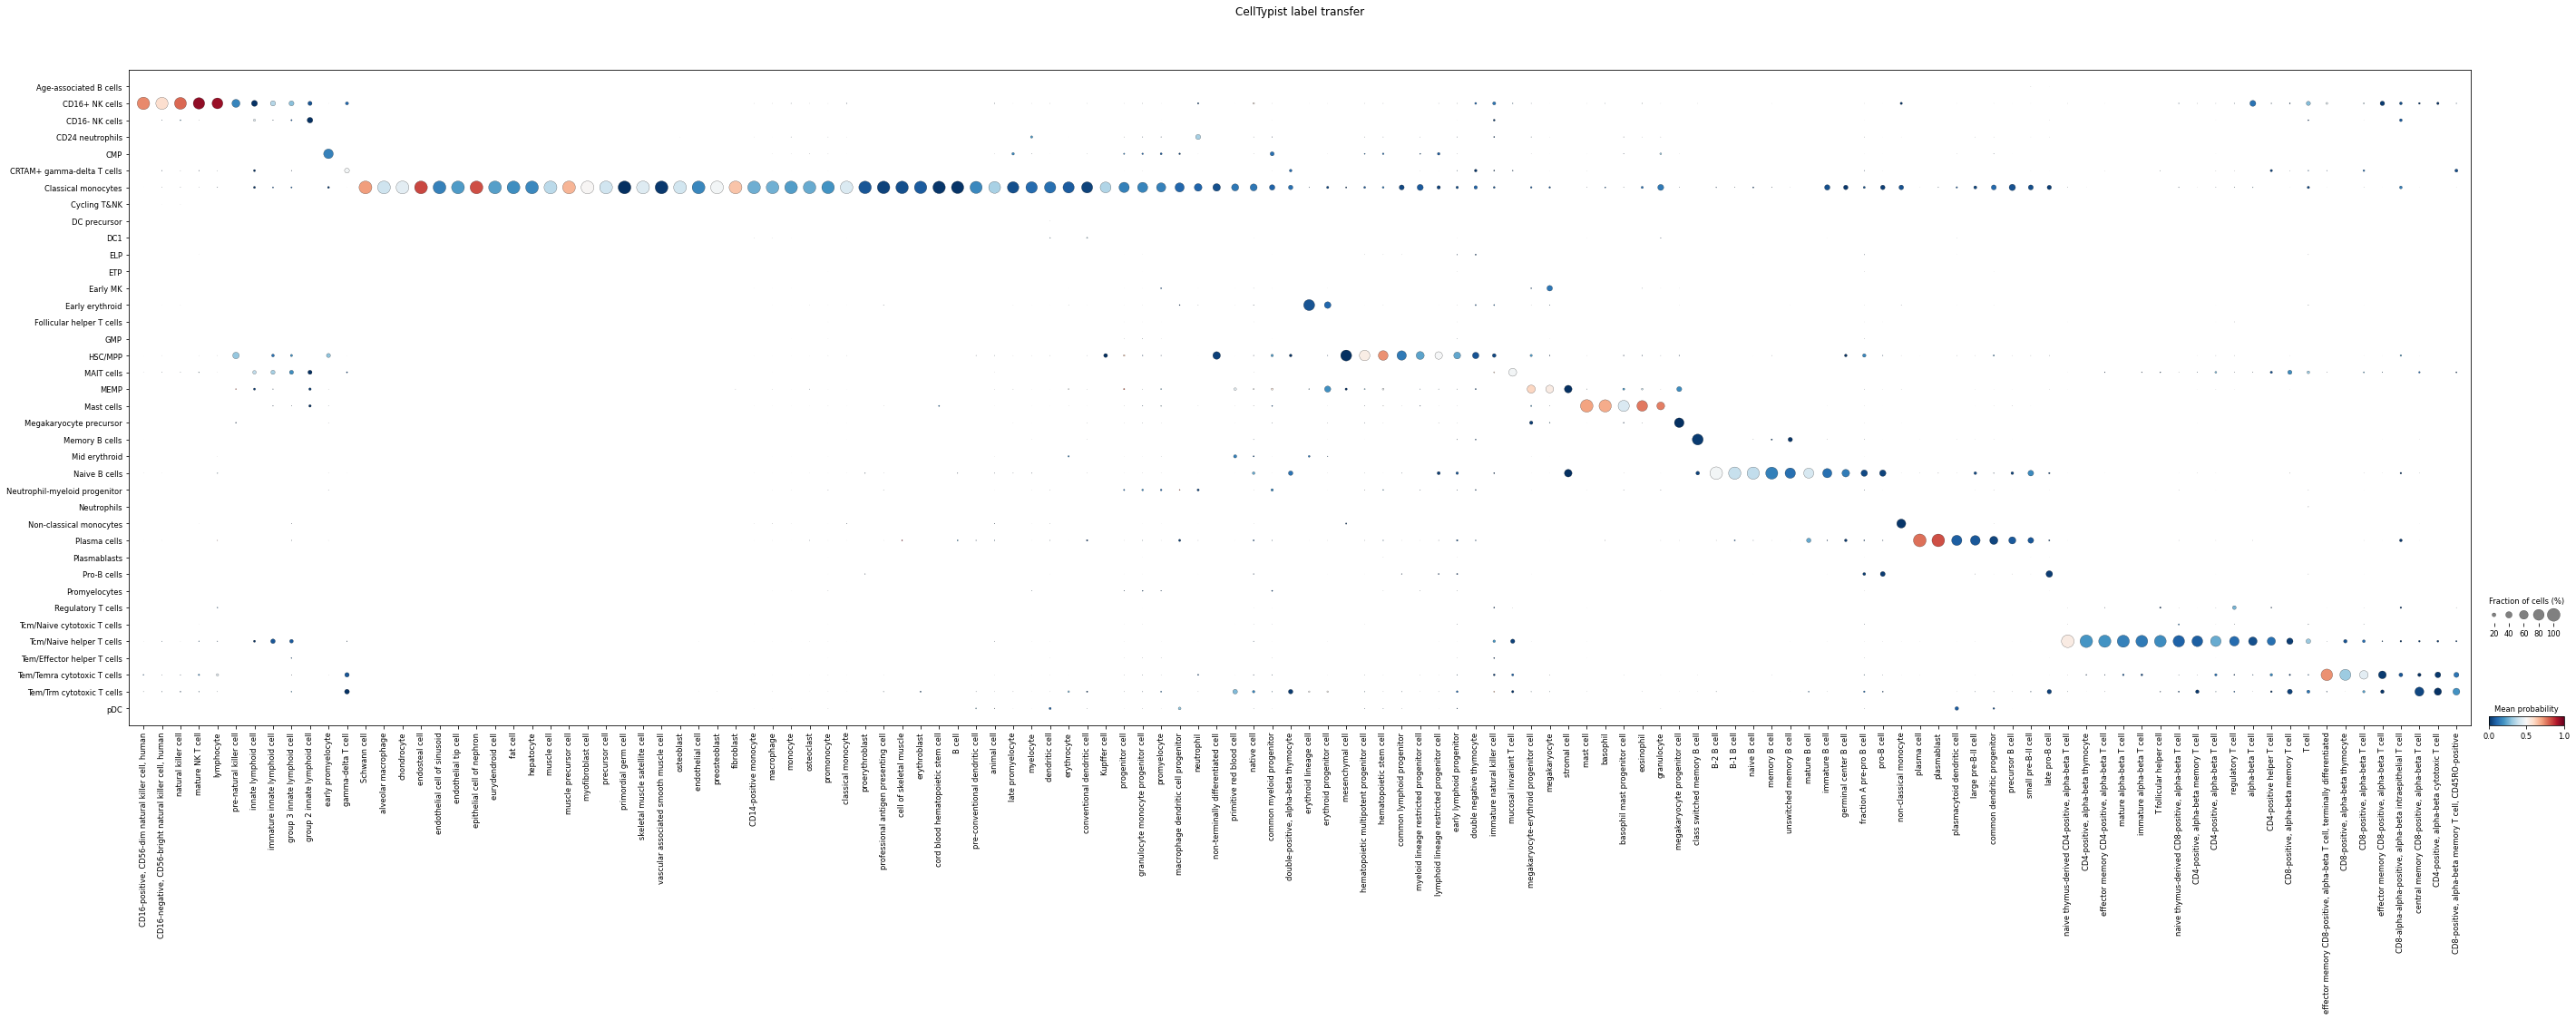

In [16]:
celltypist.dotplot(predictions, use_as_reference = 'cell_type', use_as_prediction = 'majority_voting')

In [233]:
predictions

CellTypist prediction result for 605318 query cells
    predicted_labels: data frame with 3 columns ('predicted_labels', 'over_clustering', 'majority_voting')
    decision_matrix: data frame with 605318 query cells and 45 cell types
    probability_matrix: data frame with 605318 query cells and 45 cell types
    adata: AnnData object referred

---

### Getting values that are used in dot size and color

In [27]:
from celltypist.classifier import AnnotationResult
from typing import Union, Optional
import numpy as np
import pandas as pd
import scanpy as sc

def _get_fraction_prob_df(predictions: AnnotationResult,
                          use_as_reference: Union[str, list, tuple, np.ndarray, pd.Series, pd.Index],
                          use_as_prediction: str = 'majority_voting',
                          prediction_order: Optional[Union[list, tuple, np.ndarray, pd.Series, pd.Index]] = None,
                          reference_order: Optional[Union[list, tuple, np.ndarray, pd.Series, pd.Index]] = None
                          ) -> tuple:
    """
    For internal use. Get the fraction and avg. probability data frames (predictions * truths) from AnnotationResult.
    """
    #prediction
    if use_as_prediction not in predictions.predicted_labels:
        if use_as_prediction == 'majority_voting':
            raise KeyError(
                    f"🛑 Did not find the column `majority_voting` in the `AnnotationResult.predicted_labels`, perform majority voting beforehand or use `use_as_prediction = 'predicted_labels'` instead")
        else:
            raise KeyError(
                    f"🛑 Did not find such column '{use_as_prediction}', should be one of `'majority_voting'` or `'predicted_labels'`")
    pred = predictions.predicted_labels[use_as_prediction]
    #reference
    if isinstance(use_as_reference, str):
        if use_as_reference not in predictions.adata.obs:
            raise KeyError(
                    f"🛑 Did not find such column '{use_as_reference}', please provide a valid metadata column")
        refer = predictions.adata.obs[use_as_reference]
    else:
        refer = np.array(use_as_reference)
        if len(refer) != len(pred):
            raise ValueError(
                    f"🛑 Length of `use_as_reference` ({len(refer)}) provided does not match the number of cells ({len(pred)})")
    #score
    score = [(row[pred[index]] if pred[index] in row.index else row.max()) for index, row in predictions.probability_matrix.iterrows()]
    #df x 2
    df = pd.DataFrame(dict(pred = pred, refer = refer, score = score))
    dot_size_df = df.pivot_table(values = 'score', index = 'pred', columns = 'refer', aggfunc = len, fill_value = 0, dropna = False, observed = True)
    dot_size_df = dot_size_df / dot_size_df.sum(axis = 0).values
    dot_color_df = df.pivot_table(values = 'score', index = 'pred', columns = 'refer', aggfunc = 'mean', fill_value = 0, dropna = False, observed = True)
    #reorder
    if prediction_order is None:
        prediction_order = pred.cat.categories
    else:
        if not np.array_equal(np.sort(prediction_order), np.sort(dot_size_df.index)):
            raise ValueError(
                    f"🛑 Please provide a correct and comprehensive list of prediction cell types")
        prediction_order = np.array(prediction_order)
    dot_size_df = dot_size_df.loc[prediction_order]
    dot_color_df = dot_color_df.loc[prediction_order]
    if reference_order is None:
        reference_max_pred = dot_size_df.idxmax(axis = 0)
        reference_max_score = dot_size_df.max(axis = 0)
        sort_df = pd.DataFrame(dict(reference_order = dot_size_df.columns, reference_max_pred = reference_max_pred, reference_max_score = reference_max_score))
        sort_df['reference_max_pred'] = sort_df.reference_max_pred.astype('category')
        sort_df['reference_max_pred'] = sort_df.reference_max_pred.cat.reorder_categories([x for x in dot_size_df.index if x in sort_df.reference_max_pred.cat.categories])
        reference_order = sort_df.sort_values(by=['reference_max_pred', 'reference_max_score'], ascending = [True, False]).reference_order.values
    else:
        if not np.array_equal(np.sort(reference_order), np.sort(dot_size_df.columns)):
            raise ValueError(
                    f"🛑 Please provide a correct and comprehensive list of reference cell types/clusters")
        reference_order = np.array(reference_order)
    dot_size_df = dot_size_df[reference_order]
    dot_color_df = dot_color_df[reference_order]
    #return
    return dot_size_df, dot_color_df, score

In [28]:
dot_size_df, dot_color_df, score = _get_fraction_prob_df(predictions, use_as_reference = 'cell_type', use_as_prediction = 'majority_voting')

In [237]:
range(0,len(dot_size_df.columns))

range(0, 126)

In [240]:
f"{dot_size_df.columns[0]}_size"

'CD16-positive, CD56-dim natural killer cell, human_size'

In [243]:
f"{dot_size_df2.columns[i]}_size"

'CD16-positive, CD56-dim natural killer cell, human_size'

In [251]:
dot_size_df2 = dot_size_df.T.copy()
dot_size_df2.columns = [f"{dot_size_df2.columns[i]}_size" for i in range(0,len(dot_size_df2.columns))]
dot_color_df2 = dot_color_df.T.copy()
dot_color_df2.columns = [f"{dot_color_df2.columns[i]}_color" for i in range(0,len(dot_color_df2.columns))]


In [254]:
dff = pd.concat([dot_size_df2, dot_color_df2], axis = 1)

In [255]:
dff

,Age-associated B cells_size,CD16+ NK cells_size,CD16- NK cells_size,CD24 neutrophils_size,CMP_size,CRTAM+ gamma-delta T cells_size,Classical monocytes_size,Cycling T&NK_size,DC precursor_size,DC1_size,...,Plasmablasts_color,Pro-B cells_color,Promyelocytes_color,Regulatory T cells_color,Tcm/Naive cytotoxic T cells_color,Tcm/Naive helper T cells_color,Tem/Effector helper T cells_color,Tem/Temra cytotoxic T cells_color,Tem/Trm cytotoxic T cells_color,pDC_color
refer,,,,,,,,,,,,,,,,,,,,,
"CD16-positive, CD56-dim natural killer cell, human",0.000000,0.962498,0.000000,0.000000,0.000000,0.000182,0.000137,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010262,0.000000,1.125591e-01,0.002344,0.000000
"CD16-negative, CD56-bright natural killer cell, human",0.000000,0.929110,0.012066,0.000000,0.000000,0.012821,0.005279,0.000377,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.082505,0.000000,4.710498e-02,0.048067,0.000000
natural killer cell,0.000000,0.911751,0.032513,0.000000,0.000000,0.003948,0.005341,0.000929,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010856,0.000000,6.475423e-02,0.020831,0.000000
mature NK T cell,0.000000,0.860941,0.004090,0.000000,0.000000,0.013633,0.004090,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.019124,0.149355,0.000000,1.676794e-01,0.068460,0.000000
lymphocyte,0.000000,0.801180,0.000000,0.000000,0.000000,0.004720,0.010619,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.084347,0.000000,0.081475,0.000000,4.483934e-01,0.050445,0.000000
pre-natural killer cell,0.000000,0.540541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
innate lymphoid cell,0.000000,0.363636,0.090909,0.000000,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000229,0.000000,0.000000e+00,0.000000,0.000000
immature innate lymphoid cell,0.000000,0.298507,0.014925,0.000000,0.000000,0.000000,0.044776,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.072541,0.000000,0.000000e+00,0.000000,0.000000
group 3 innate lymphoid cell,0.000000,0.282297,0.047847,0.000000,0.000000,0.014354,0.047847,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.080075,0.110163,1.554182e-03,0.202023,0.000000


In [149]:
ddff.shape

(126, 38)

In [150]:
linkage_data.shape

(125, 4)

### Using clustering to group cell types from census

#### K-means

In [256]:
from sklearn.cluster import KMeans

# create the estimator and set k to 3
estimator = KMeans(n_clusters = 8)

# fit the model and return the clusters
labels = estimator.fit_predict(dff)


In [212]:
pd.set_option('display.max_rows', 150)

In [257]:
clusters = pd.DataFrame(labels, index=dot_size_df.T.index)

In [258]:
clusters

,0
refer,
"CD16-positive, CD56-dim natural killer cell, human",1
"CD16-negative, CD56-bright natural killer cell, human",1
natural killer cell,1
mature NK T cell,1
lymphocyte,1
pre-natural killer cell,5
innate lymphoid cell,5
immature innate lymphoid cell,5
group 3 innate lymphoid cell,5


#### AgglomerativeClustering

In [260]:
# import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

# create the clusterer
agg = AgglomerativeClustering(n_clusters = 8, linkage='complete')

# create the clusters
labels = agg.fit_predict(dff)

# create a scatter plot
clusters = pd.DataFrame(labels, index=dff.index)

In [261]:
clusters

,0
refer,
"CD16-positive, CD56-dim natural killer cell, human",3
"CD16-negative, CD56-bright natural killer cell, human",3
natural killer cell,3
mature NK T cell,3
lymphocyte,3
pre-natural killer cell,0
innate lymphoid cell,1
immature innate lymphoid cell,1
group 3 innate lymphoid cell,1


In [262]:
clusters[0].value_counts()

6    43
1    41
0    20
5     6
3     5
4     5
2     3
7     3
Name: 0, dtype: int64

In [209]:
clusters[clusters[0] == 0].index

Index(['Schwann cell', 'alveolar macrophage', 'chondrocyte', 'endosteal cell',
       'endothelial cell of sinusoid', 'endothelial tip cell',
       'epithelial cell of nephron', 'eurydendroid cell', 'fat cell',
       'hepatocyte', 'muscle cell', 'muscle precursor cell',
       'myofibroblast cell', 'precursor cell', 'primordial germ cell',
       'skeletal muscle satellite cell',
       'vascular associated smooth muscle cell', 'osteoblast',
       'endothelial cell', 'preosteoblast', 'fibroblast',
       'CD14-positive monocyte', 'macrophage', 'monocyte', 'osteoclast',
       'promonocyte', 'classical monocyte', 'proerythroblast',
       'professional antigen presenting cell', 'cell of skeletal muscle',
       'erythroblast', 'cord blood hematopoietic stem cell', 'B cell',
       'pre-conventional dendritic cell', 'animal cell', 'late promyelocyte',
       'myelocyte', 'dendritic cell', 'erythrocyte',
       'conventional dendritic cell', 'Kupffer cell', 'progenitor cell',
       'g

In [202]:
clusters

,0
refer,
"CD16-positive, CD56-dim natural killer cell, human",1
"CD16-negative, CD56-bright natural killer cell, human",1
natural killer cell,1
mature NK T cell,1
lymphocyte,1
...,...
"effector memory CD8-positive, alpha-beta T cell",4
"CD8-alpha-alpha-positive, alpha-beta intraepithelial T cell",4
"central memory CD8-positive, alpha-beta T cell",4


#### Hierarchical

In [137]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [156]:
import matplotlib

In [157]:
matplotlib.rcParams['figure.figsize'] = [15, 45]

In [263]:
from scipy.cluster.hierarchy import ward, fcluster

assignments = fcluster(linkage(dff, method='complete'),1.2,'distance')

In [265]:
assignments

array([ 1,  1,  1,  1,  1, 10, 20, 20, 20, 20, 10, 12,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  7,  7,  7,  7,  7, 11,  7,  7,  7,
        7,  7, 11,  7,  7,  4,  7,  9, 14,  6, 14, 21, 13, 13,  9,  9, 10,
        9,  9,  9,  9,  9, 20, 20,  5, 14, 18,  2,  2,  3,  2,  2, 21, 21,
       18, 18, 18, 18, 18, 18, 18, 21, 21, 21, 12, 16, 16, 16, 15, 15, 15,
       21, 21, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 17,
       17, 17, 20, 20, 20, 20, 20], dtype=int32)

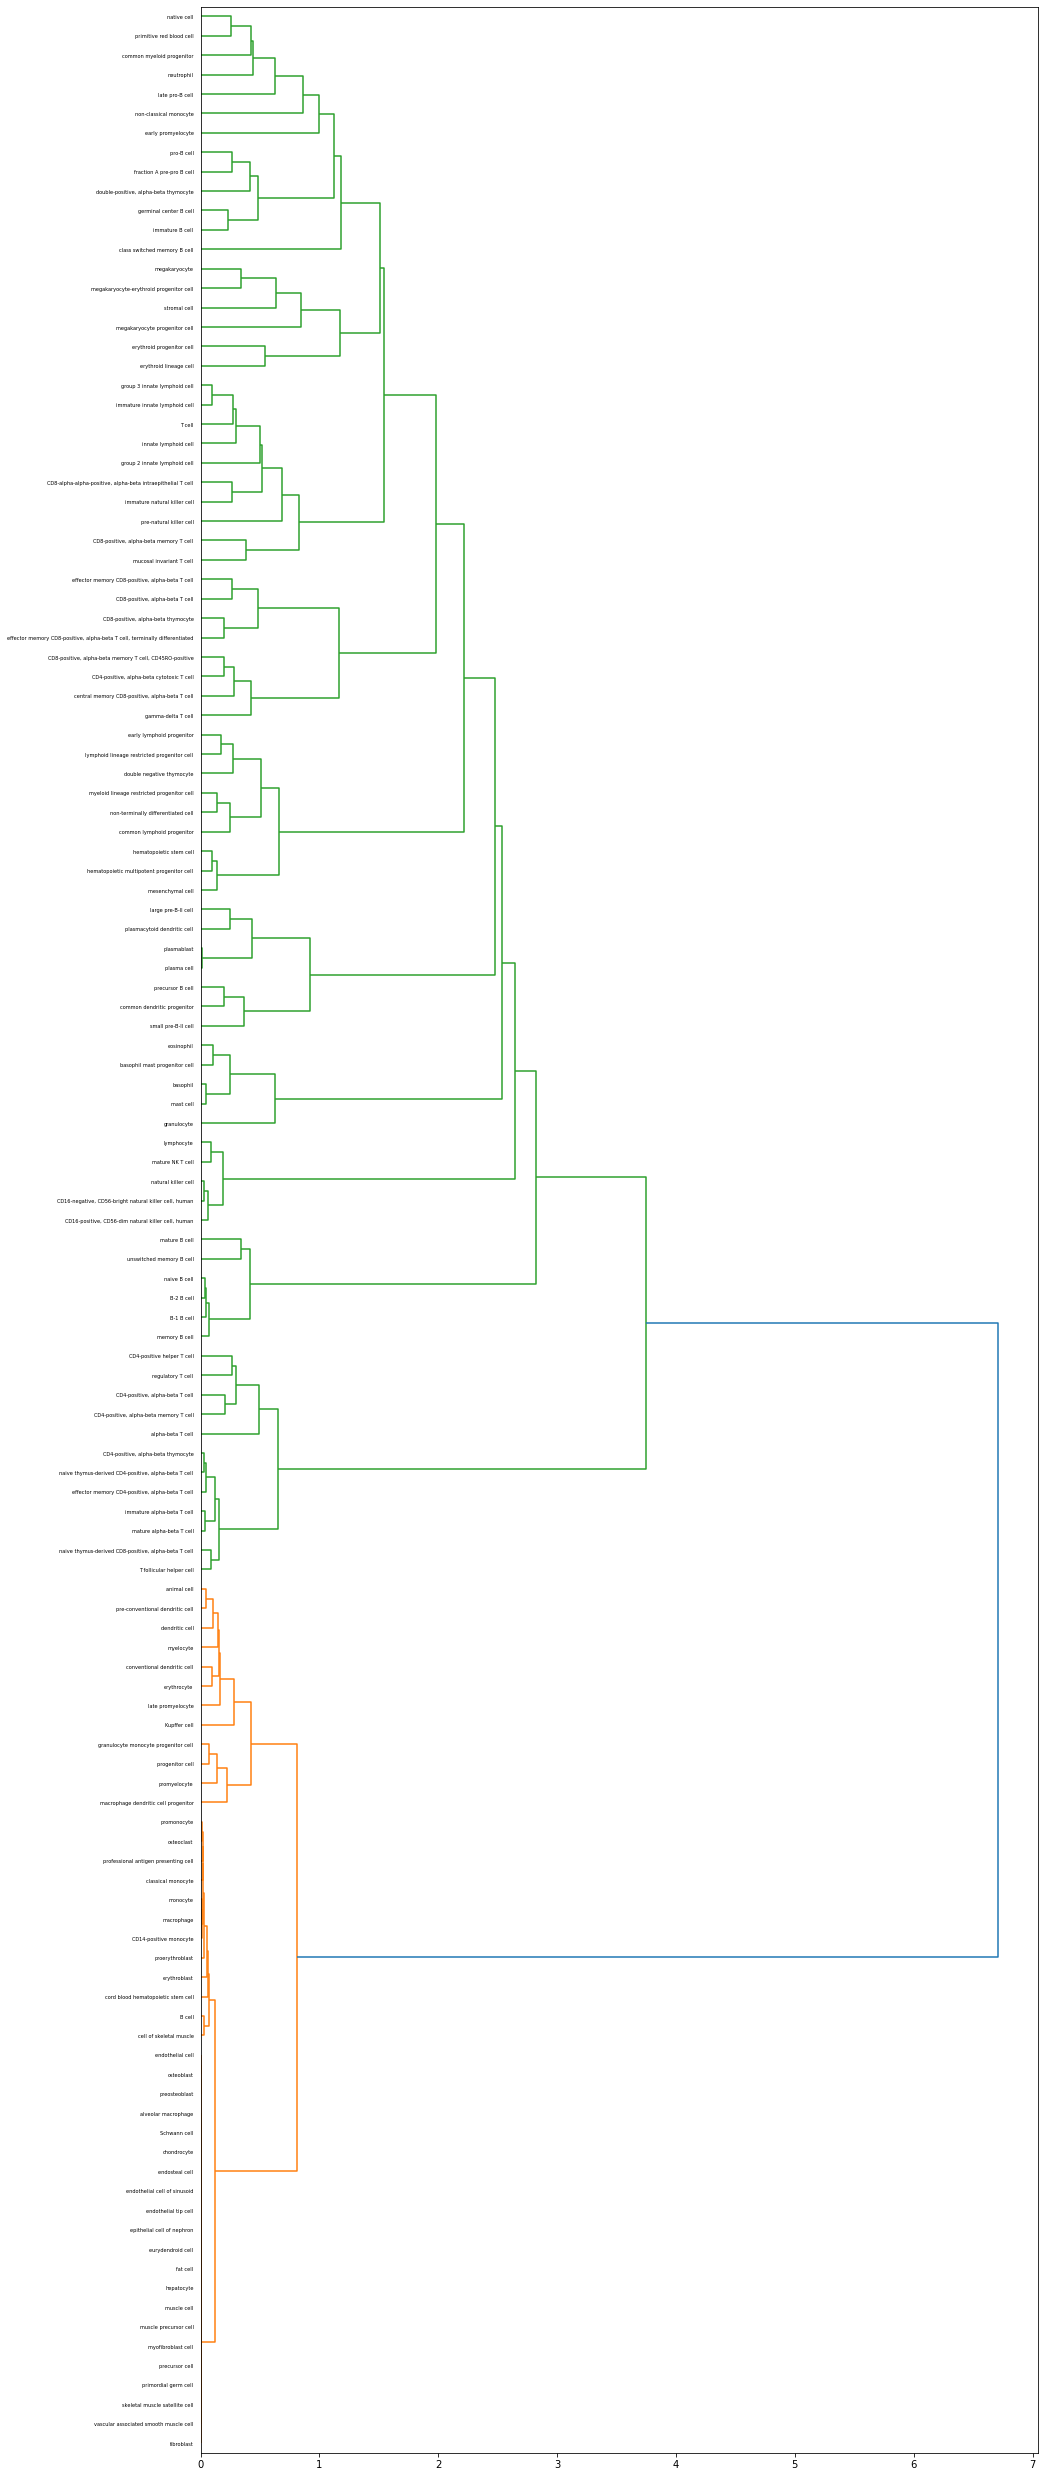

In [161]:
linkage_data = linkage(dot_size_df.T, method='complete', metric='euclidean')
dendrogram(linkage_data, orientation='right', labels = list(ddff.index))

plt.show()

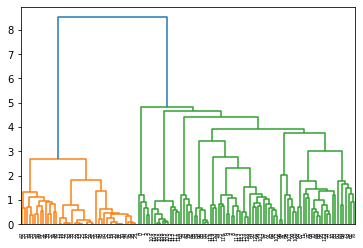

In [143]:
linkage_data = linkage(ddff, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [32]:
len(score)

605318

In [35]:
adata

AnnData object with n_obs × n_vars = 605318 × 10000
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Age-associated B cells', 'CD16+ NK cells', 'CD16- NK cells', 'CD24 neutrophils', 'CMP', 'CRTAM+ gamma-delta T cells', 'Classical monocytes', 'Cycling T&NK', 'DC precursor', 'DC1', 'DC2', 'ELP', 'ETP', 'Early MK', 'Early erythroid', 'Erythrocytes', 'Follicular helper T cells', 'GMP', 'HSC/MPP', 'Late erythroid', 'MAIT cells', 'MEMP', 'Mast cells', 'Megakaryocyte precursor', 'M

In [36]:
colss = ['tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Age-associated B cells', 'CD16+ NK cells', 'CD16- NK cells', 'CD24 neutrophils', 'CMP', 'CRTAM+ gamma-delta T cells', 'Classical monocytes', 'Cycling T&NK', 'DC precursor', 'DC1', 'DC2', 'ELP', 'ETP', 'Early MK', 'Early erythroid', 'Erythrocytes', 'Follicular helper T cells', 'GMP', 'HSC/MPP', 'Late erythroid', 'MAIT cells', 'MEMP', 'Mast cells', 'Megakaryocyte precursor', 'Megakaryocytes/platelets', 'Memory B cells', 'Mid erythroid', 'NAMPT neutrophils', 'Naive B cells', 'Neutrophil-myeloid progenitor', 'Neutrophils', 'Non-classical monocytes', 'Plasma cells', 'Plasmablasts', 'Pro-B cells', 'Promyelocytes', 'Regulatory T cells', 'Small pre-B cells', 'Tcm/Naive cytotoxic T cells', 'Tcm/Naive helper T cells', 'Tem/Effector helper T cells', 'Tem/Temra cytotoxic T cells', 'Tem/Trm cytotoxic T cells', 'pDC', 'pDC precursor']

In [38]:
meta0 = pd.concat([adata.obs[['cell_type', 'cell_type_ontology_term_id']], adata.obs.loc[:,colss]], axis = 1)

In [39]:
meta0

,cell_type,cell_type_ontology_term_id,tissue_ontology_term_id,tissue_general,tissue_general_ontology_term_id,_scvi_batch,_scvi_labels,leiden,predicted_labels,over_clustering,...,Promyelocytes,Regulatory T cells,Small pre-B cells,Tcm/Naive cytotoxic T cells,Tcm/Naive helper T cells,Tem/Effector helper T cells,Tem/Temra cytotoxic T cells,Tem/Trm cytotoxic T cells,pDC,pDC precursor
0,lymphoid lineage restricted progenitor cell,CL:0000838,UBERON:0002371,bone marrow,UBERON:0002371,12,0,54,Classical monocytes,68,...,0.003916,0.000900,0.001464,0.003480,0.000311,0.000549,0.000489,0.002075,0.002336,0.000825
1,pro-B cell,CL:0000826,UBERON:0002371,bone marrow,UBERON:0002371,12,0,41,HSC/MPP,1815,...,0.000490,0.001443,0.001108,0.001297,0.000334,0.000167,0.000057,0.020167,0.001907,0.000294
2,common lymphoid progenitor,CL:0000051,UBERON:0002371,bone marrow,UBERON:0002371,12,0,54,HSC/MPP,68,...,0.001874,0.001211,0.001447,0.001342,0.000180,0.006591,0.000051,0.007328,0.000507,0.000388
3,pro-B cell,CL:0000826,UBERON:0002371,bone marrow,UBERON:0002371,12,0,41,HSC/MPP,21,...,0.003668,0.000639,0.001326,0.000388,0.000028,0.000640,0.000177,0.008033,0.006674,0.000551
4,lymphoid lineage restricted progenitor cell,CL:0000838,UBERON:0002371,bone marrow,UBERON:0002371,12,0,54,Classical monocytes,68,...,0.002735,0.002603,0.001396,0.000814,0.000242,0.000474,0.001790,0.004055,0.001096,0.001399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605313,professional antigen presenting cell,CL:0000145,UBERON:0002371,bone marrow,UBERON:0002371,3,0,33,HSC/MPP,69,...,0.000269,0.000880,0.001046,0.002805,0.000326,0.000388,0.000028,0.000107,0.000693,0.000783
605314,professional antigen presenting cell,CL:0000145,UBERON:0002371,bone marrow,UBERON:0002371,3,0,33,Non-classical monocytes,69,...,0.000608,0.002087,0.001409,0.000527,0.001587,0.000563,0.001154,0.000934,0.000777,0.000638
605315,professional antigen presenting cell,CL:0000145,UBERON:0002371,bone marrow,UBERON:0002371,3,0,33,Classical monocytes,69,...,0.000926,0.001985,0.001091,0.000592,0.000038,0.001525,0.000006,0.003829,0.001219,0.001468
605316,professional antigen presenting cell,CL:0000145,UBERON:0002371,bone marrow,UBERON:0002371,3,0,33,Non-classical monocytes,69,...,0.000650,0.001625,0.001086,0.000363,0.000630,0.000247,0.001572,0.000237,0.000878,0.001108


In [60]:
indd=[eval(i) for i in list(adata.obs['conf_score'].sort_values(ascending = False).index)]

In [80]:
meta1 = meta0.iloc[indd,]

In [83]:
meta1 = meta1.loc[:,['cell_type', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score']]

In [84]:
meta2 = meta1[meta1.majority_voting == 'CD16+ NK cells']

In [85]:
meta2

,cell_type,predicted_labels,over_clustering,majority_voting,conf_score
578896,mature NK T cell,CD16+ NK cells,231,CD16+ NK cells,1.000000
566599,mature NK T cell,CD16+ NK cells,231,CD16+ NK cells,1.000000
499017,"CD16-positive, CD56-dim natural killer cell, h...",CD16+ NK cells,231,CD16+ NK cells,1.000000
533437,"CD16-positive, CD56-dim natural killer cell, h...",CD16+ NK cells,231,CD16+ NK cells,1.000000
536388,"CD16-positive, CD56-dim natural killer cell, h...",CD16+ NK cells,518,CD16+ NK cells,1.000000
...,...,...,...,...,...
428485,"effector memory CD8-positive, alpha-beta T cell",NAMPT neutrophils,45,CD16+ NK cells,0.002182
427726,"effector memory CD8-positive, alpha-beta T cell",Classical monocytes,45,CD16+ NK cells,0.002057
428343,gamma-delta T cell,Plasma cells,45,CD16+ NK cells,0.001940
426065,gamma-delta T cell,Plasma cells,45,CD16+ NK cells,0.001844


In [91]:
meta2['cell_type']

578896                                     mature NK T cell
566599                                     mature NK T cell
499017    CD16-positive, CD56-dim natural killer cell, h...
533437    CD16-positive, CD56-dim natural killer cell, h...
536388    CD16-positive, CD56-dim natural killer cell, h...
                                ...                        
428485      effector memory CD8-positive, alpha-beta T cell
427726      effector memory CD8-positive, alpha-beta T cell
428343                                   gamma-delta T cell
426065                                   gamma-delta T cell
427234               CD4-positive, alpha-beta memory T cell
Name: cell_type, Length: 36736, dtype: category
Categories (126, object): ['B cell', 'B-1 B cell', 'B-2 B cell', 'CD4-positive helper T cell', ..., 'small pre-B-II cell', 'stromal cell', 'unswitched memory B cell', 'vascular associated smooth muscle cell']

In [92]:
meta2['cell_type'] = meta2['cell_type'].cat.remove_unused_categories()

/tmp/ipykernel_1563/1945545647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta2['cell_type'] = meta2['cell_type'].cat.remove_unused_categories()


In [95]:
meta2.groupby('cell_type')['conf_score'].mean().sort_values()

cell_type
small pre-B-II cell                                0.008954
non-classical monocyte                             0.011737
CD4-positive, alpha-beta memory T cell             0.013508
late promyelocyte                                  0.018118
CD4-positive, alpha-beta cytotoxic T cell          0.018941
                                                     ...   
natural killer cell                                0.800421
granulocyte                                        0.856001
effector memory CD4-positive, alpha-beta T cell    0.933720
lymphocyte                                         0.934445
mature NK T cell                                   0.949854
Name: conf_score, Length: 71, dtype: float64

In [66]:
meta1.columns

Index(['cell_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id',
       'tissue_general', 'tissue_general_ontology_term_id', '_scvi_batch',
       '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering',
       'majority_voting', 'conf_score', 'Age-associated B cells',
       'CD16+ NK cells', 'CD16- NK cells', 'CD24 neutrophils', 'CMP',
       'CRTAM+ gamma-delta T cells', 'Classical monocytes', 'Cycling T&NK',
       'DC precursor', 'DC1', 'DC2', 'ELP', 'ETP', 'Early MK',
       'Early erythroid', 'Erythrocytes', 'Follicular helper T cells', 'GMP',
       'HSC/MPP', 'Late erythroid', 'MAIT cells', 'MEMP', 'Mast cells',
       'Megakaryocyte precursor', 'Megakaryocytes/platelets', 'Memory B cells',
       'Mid erythroid', 'NAMPT neutrophils', 'Naive B cells',
       'Neutrophil-myeloid progenitor', 'Neutrophils',
       'Non-classical monocytes', 'Plasma cells', 'Plasmablasts',
       'Pro-B cells', 'Promyelocytes', 'Regulatory T cells',
       'Small pre-B cells',

In [ ]:
meta1.loc[,]

In [31]:
score

[0.031867342397066685,
 0.004241465554291868,
 0.017886637889248387,
 0.001050328293904711,
 0.09381839733980155,
 0.023033137899173533,
 0.018795842110869227,
 0.0005813715677877597,
 0.012726302862690131,
 0.0028821778918170456,
 0.014006872665005287,
 0.03880606444251438,
 0.0014701190517992474,
 0.01160001397173782,
 9.225554734940559e-05,
 0.0011361496938291787,
 0.9999430569922598,
 0.999926004156967,
 0.0004304975344998314,
 0.002783113349035446,
 0.000796659973728091,
 0.0321407206577878,
 0.008837142133453048,
 0.028679030826498354,
 0.005803519006608992,
 0.000707031710057427,
 0.007212908490652538,
 0.004975659382230775,
 0.9852425451658436,
 0.009942077388998586,
 0.005831213862062163,
 0.002660900605815124,
 0.008088576893931436,
 0.996233505396247,
 0.020989028411136645,
 0.003316088831131059,
 0.0017499320706684221,
 0.01796714228695473,
 0.0019655233613759568,
 0.02212888639893974,
 0.0013485417484531868,
 0.9974568993803435,
 0.4325735495856841,
 5.3272217761666244e-05

### Running celltypist for all models and adding all the outputs to a single object

In [2]:
glob.glob('/lustre/scratch127/cellgen/cellgeni/projects/celltypist-cellcensus/celltypist_models/Bone_marrow/*')
models = glob.glob('/lustre/scratch127/cellgen/cellgeni/projects/celltypist-cellcensus/celltypist_models/Bone_marrow/*')

In [7]:
for i in models:
    adata = sc.read('/lustre/scratch127/cellgen/cellgeni/cakirb/census/bonemarrow_integrated.h5ad')
    model = celltypist.models.Model.load(model = i)
    name = i.split('/')[-1].split('.')[0]
    print(name)
    # normalization
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    adata.var_names = adata.var['feature_name']
    # train a model
    predictions = celltypist.annotate(adata, i, majority_voting = True)
    # transfer predictions to anndata 
    adata = predictions.to_adata(insert_prob=True).copy()
    if i == models[0]:
        adata_big = adata.copy()
    for ct in model.cell_types:
        for col in 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score':
            adata_big.obs[f'{col} in {name}'] = adata.obs[col]
        adata_big.obs[f'{ct} in {name}'] = adata.obs[ct]
    if i == models[0]:
        for ct in model.cell_types:
            del adata_big.obs[ct]
        for col in 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score':
            del adata_big.obs[col]
    #celltypist.dotplot(predictions, use_as_reference = 'cell_type', use_as_prediction = 'predicted_labels', save = f'{name}.png')
    #celltypist.dotplot(predictions, use_as_reference = 'cell_type', use_as_prediction = 'majority_voting' , save = f'{name}.png')
    del adata
    gc.collect()

Adult_Bone_marrow_Royetal


🔬 Input data has 605318 cells and 10000 genes
🔗 Matching reference genes in the model
🧬 467 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 30
🗳️ Majority voting the predictions
✅ Majority voting done!


Adult_Bone_marrow_DominguezCondeetal


🔬 Input data has 605318 cells and 10000 genes
🔗 Matching reference genes in the model
🧬 751 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 30
🗳️ Majority voting the predictions
✅ Majority voting done!


Adult_Bone_marrow_Heetal


🔬 Input data has 605318 cells and 10000 genes
🔗 Matching reference genes in the model
🧬 709 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 30
🗳️ Majority voting the predictions
✅ Majority voting done!


Adult_Bone_marrow_TabulaSapiens2022


🔬 Input data has 605318 cells and 10000 genes
🔗 Matching reference genes in the model
🧬 647 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 30
🗳️ Majority voting the predictions
✅ Majority voting done!


Adult_Human_Bone_marrow


🔬 Input data has 605318 cells and 10000 genes
🔗 Matching reference genes in the model
🧬 1426 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 30
🗳️ Majority voting the predictions
✅ Majority voting done!
/tmp/ipykernel_11939/1269056306.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata_big.obs[f'{ct} in {name}'] = adata.obs[ct]
/tmp/ipykernel_11939/1269056306.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

In [8]:
adata_big

AnnData object with n_obs × n_vars = 605318 × 10000
    obs: 'soma_joinid', 'dataset_id', 'assay', 'assay_ontology_term_id', 'cell_type', 'cell_type_ontology_term_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'donor_id', 'is_primary_data', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'suspension_type', 'tissue', 'tissue_ontology_term_id', 'tissue_general', 'tissue_general_ontology_term_id', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels in Adult_Bone_marrow_Royetal', 'over_clustering in Adult_Bone_marrow_Royetal', 'majority_voting in Adult_Bone_marrow_Royetal', 'conf_score in Adult_Bone_marrow_Royetal', 'B lymphoid in Adult_Bone_marrow_Royetal', 'B lymphoid (cycling) in Adult_Bone_marrow_Royetal', 'Early lymphoid in Adult_Bone_marrow_Royetal', 'Early myeloid in Adult_Bone_marrow_Royetal', 'Endothelial cell in Adult_Bone_marrow_Royetal', 'Eosinophil/Basophil/Mast

In [14]:
adata_big.write('/lustre/scratch127/cellgen/cellgeni/cakirb/census/bonemarrow_scvi_celltypist.h5ad', compression = 'gzip')

In [8]:
celltypist.dotplot(predictions, use_as_reference = 'cell_type', use_as_prediction = 'predicted_labels', save = 'celltypist_dotplot.png')

Object `celltypist.dotplot(predictions, use_as_reference = 'cell_type', use_as_prediction = 'predicted_labels', save = 'celltypist_dotplot.png')` not found.


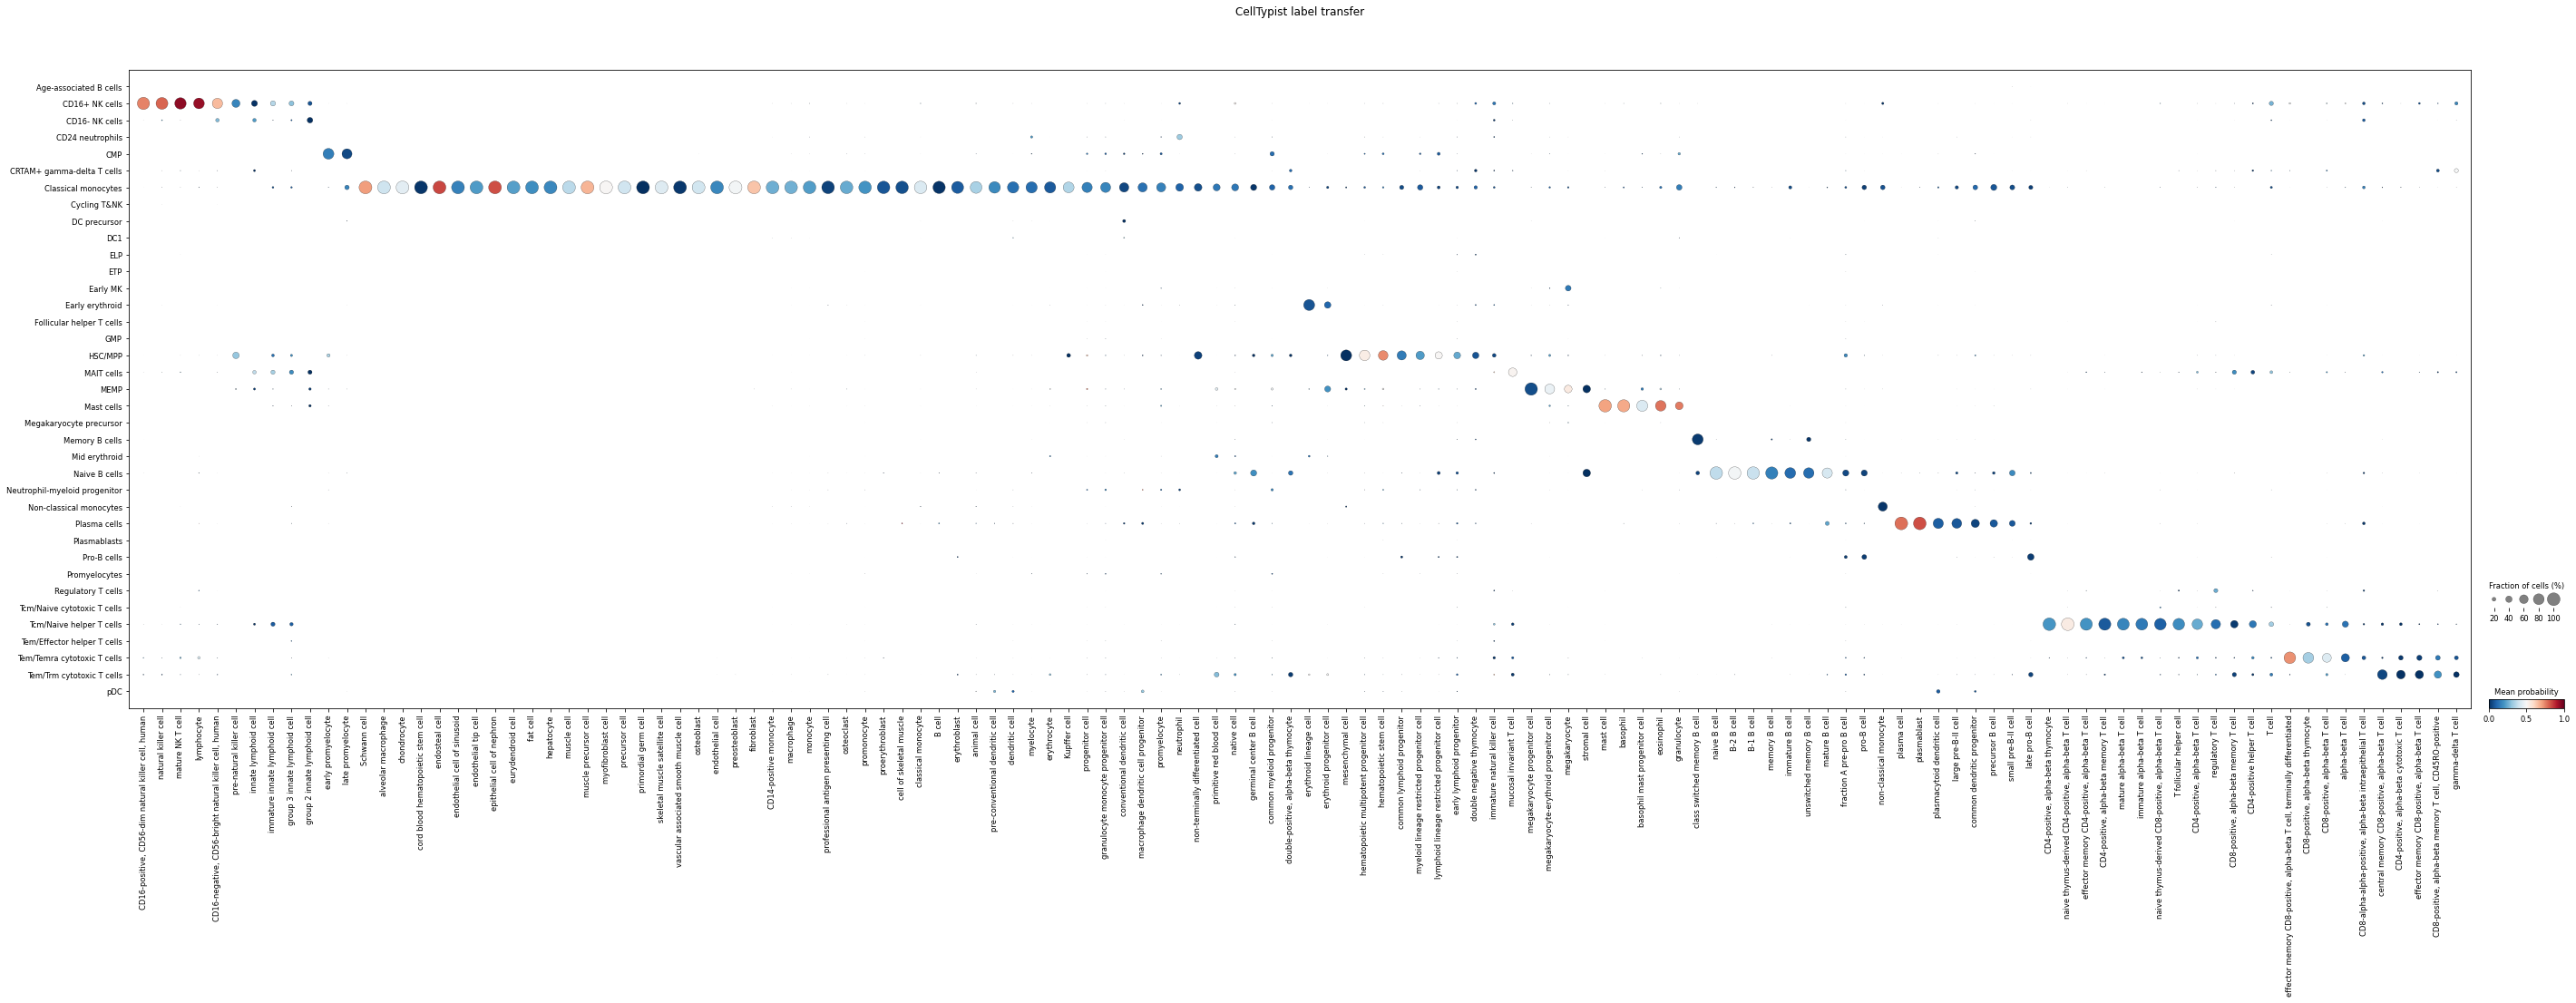

In [14]:
celltypist.dotplot(predictions, use_as_reference = 'cell_type', use_as_prediction = 'majority_voting')

### Getting values that are used in dot size and color (step by step)

In [105]:
plott = celltypist.dotplot(predictions, use_as_reference = 'cell_type', use_as_prediction = 'majority_voting', return_fig = True)

In [115]:
prediction_order = None
reference_order = None
filter_prediction = 0.0
cmap = 'RdBu_r'

In [ ]:
prediction_order = None
reference_order = None
filter_prediction = 0.0
cmap = 'RdBu_r'
vmin = 0.0
vmax: Optional[float] = 1.0
colorbar_title: Optional[str] = 'Mean probability',
#size
dot_min: Optional[float] = 0.0,
dot_max: Optional[float] = 1.0,
smallest_dot: Optional[float] = 0.0,
#size bar
size_title: Optional[str] = 'Fraction of cells (%)',
#global
swap_axes: Optional[bool] = False,
title: Optional[str] = 'CellTypist label transfer',
figsize: Optional[tuple] = None,
#display
show: Optional[bool] = None,
save: Union[str, bool, None] = None,
ax: Optional[sc.pl._utils._AxesSubplot] = None,
return_fig: Optional[bool] = False,

In [116]:
# dot_size_df, dot_color_df = _get_fraction_prob_df(predictions, use_as_reference, use_as_prediction, None, None)
#reference
reference_order = reference_order if reference_order is not None else dot_size_df.columns
#prediction
if prediction_order is None:
    if filter_prediction < 0 or filter_prediction > 1:
        raise ValueError(
                f"🛑 Please provide the `filter_prediction` between 0 and 1")
    keep_pred = dot_size_df.max(axis = 1) >= filter_prediction
    prediction_order = dot_size_df.index[keep_pred]
#in case reference_order or prediction_order is string
if isinstance(reference_order, str):
    reference_order = [reference_order]
if isinstance(prediction_order, str):
    prediction_order = [prediction_order]
#subset
dot_size_df = dot_size_df.loc[prediction_order, reference_order]
dot_color_df = dot_color_df.loc[prediction_order, reference_order]
#column to string
dot_size_df.columns = dot_size_df.columns.astype(str)
dot_color_df.columns = dot_color_df.columns.astype(str)
#AnnData, groupby, and var_names
_adata = sc.AnnData(np.zeros(dot_size_df.shape))
_adata.var_names = dot_size_df.columns
_adata.obs_names = dot_size_df.index
_adata.obs['_pred'] = dot_size_df.index

In [129]:
dot_color_df

refer,"CD16-positive, CD56-dim natural killer cell, human","CD16-negative, CD56-bright natural killer cell, human",natural killer cell,mature NK T cell,lymphocyte,pre-natural killer cell,innate lymphoid cell,immature innate lymphoid cell,group 3 innate lymphoid cell,group 2 innate lymphoid cell,...,"CD8-positive, alpha-beta memory T cell",T cell,"effector memory CD8-positive, alpha-beta T cell, terminally differentiated","CD8-positive, alpha-beta thymocyte","CD8-positive, alpha-beta T cell","effector memory CD8-positive, alpha-beta T cell","CD8-alpha-alpha-positive, alpha-beta intraepithelial T cell","central memory CD8-positive, alpha-beta T cell","CD4-positive, alpha-beta cytotoxic T cell","CD8-positive, alpha-beta memory T cell, CD45RO-positive"
Age-associated B cells,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CD16+ NK cells,0.741197,0.585128,0.788542,0.943953,0.930548,0.167970,0.004732,0.355804,0.289995,0.066925,...,0.006441,0.285118,0.439911,0.000000,0.359684,0.023205,0.052958,0.011934,0.001700,0.070937
CD16- NK cells,0.000000,0.204155,0.227789,0.030281,0.000000,0.000000,0.430566,0.004664,0.085615,0.000951,...,0.000000,0.024928,0.000000,0.000000,0.057910,0.000000,0.081088,0.000000,0.000000,0.000000
CD24 neutrophils,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CMP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CRTAM+ gamma-delta T cells,0.016092,0.031183,0.022918,0.024324,0.117769,0.000000,0.001135,0.000000,0.003450,0.000000,...,0.137044,0.108554,0.111585,0.000000,0.117309,0.000000,0.000000,0.000000,0.000000,0.056820
Classical monocytes,0.019238,0.046920,0.038583,0.156218,0.031947,0.000000,0.000135,0.090293,0.107411,0.000000,...,0.006192,0.046590,0.003486,0.000000,0.068866,0.005580,0.153084,0.049007,0.000000,0.010112
Cycling T&NK,0.000000,0.015565,0.014643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DC precursor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DC1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [128]:
dot_size_df

refer,"CD16-positive, CD56-dim natural killer cell, human","CD16-negative, CD56-bright natural killer cell, human",natural killer cell,mature NK T cell,lymphocyte,pre-natural killer cell,innate lymphoid cell,immature innate lymphoid cell,group 3 innate lymphoid cell,group 2 innate lymphoid cell,...,"CD8-positive, alpha-beta memory T cell",T cell,"effector memory CD8-positive, alpha-beta T cell, terminally differentiated","CD8-positive, alpha-beta thymocyte","CD8-positive, alpha-beta T cell","effector memory CD8-positive, alpha-beta T cell","CD8-alpha-alpha-positive, alpha-beta intraepithelial T cell","central memory CD8-positive, alpha-beta T cell","CD4-positive, alpha-beta cytotoxic T cell","CD8-positive, alpha-beta memory T cell, CD45RO-positive"
Age-associated B cells,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CD16+ NK cells,0.962498,0.929110,0.911751,0.860941,0.801180,0.540541,0.363636,0.298507,0.282297,0.222222,...,0.031649,0.220488,0.080790,0.000000,0.039447,0.248416,0.133333,0.072566,0.107399,0.015199
CD16- NK cells,0.000000,0.012066,0.032513,0.004090,0.000000,0.000000,0.090909,0.014925,0.047847,0.333333,...,0.000000,0.035122,0.000000,0.000000,0.000883,0.000000,0.133333,0.000000,0.000000,0.000000
CD24 neutrophils,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CMP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CRTAM+ gamma-delta T cells,0.000182,0.012821,0.003948,0.013633,0.004720,0.000000,0.090909,0.000000,0.014354,0.000000,...,0.005478,0.023415,0.012867,0.000000,0.073594,0.000000,0.000000,0.000000,0.000000,0.153022
Classical monocytes,0.000137,0.005279,0.005341,0.004090,0.010619,0.000000,0.090909,0.044776,0.047847,0.000000,...,0.000609,0.106341,0.000598,0.000000,0.003533,0.000226,0.133333,0.000370,0.000000,0.001036
Cycling T&NK,0.000000,0.000377,0.000929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DC precursor,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DC1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [122]:
_adata = _adata.T

In [127]:
_adata.var

,_pred
Age-associated B cells,Age-associated B cells
CD16+ NK cells,CD16+ NK cells
CD16- NK cells,CD16- NK cells
CD24 neutrophils,CD24 neutrophils
CMP,CMP
CRTAM+ gamma-delta T cells,CRTAM+ gamma-delta T cells
Classical monocytes,Classical monocytes
Cycling T&NK,Cycling T&NK
DC precursor,DC precursor
DC1,DC1


In [125]:
sum(_adata.X)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [106]:
type(plott)

scanpy.plotting._dotplot.DotPlot

In [109]:
plott2 = plott.swap_axes()

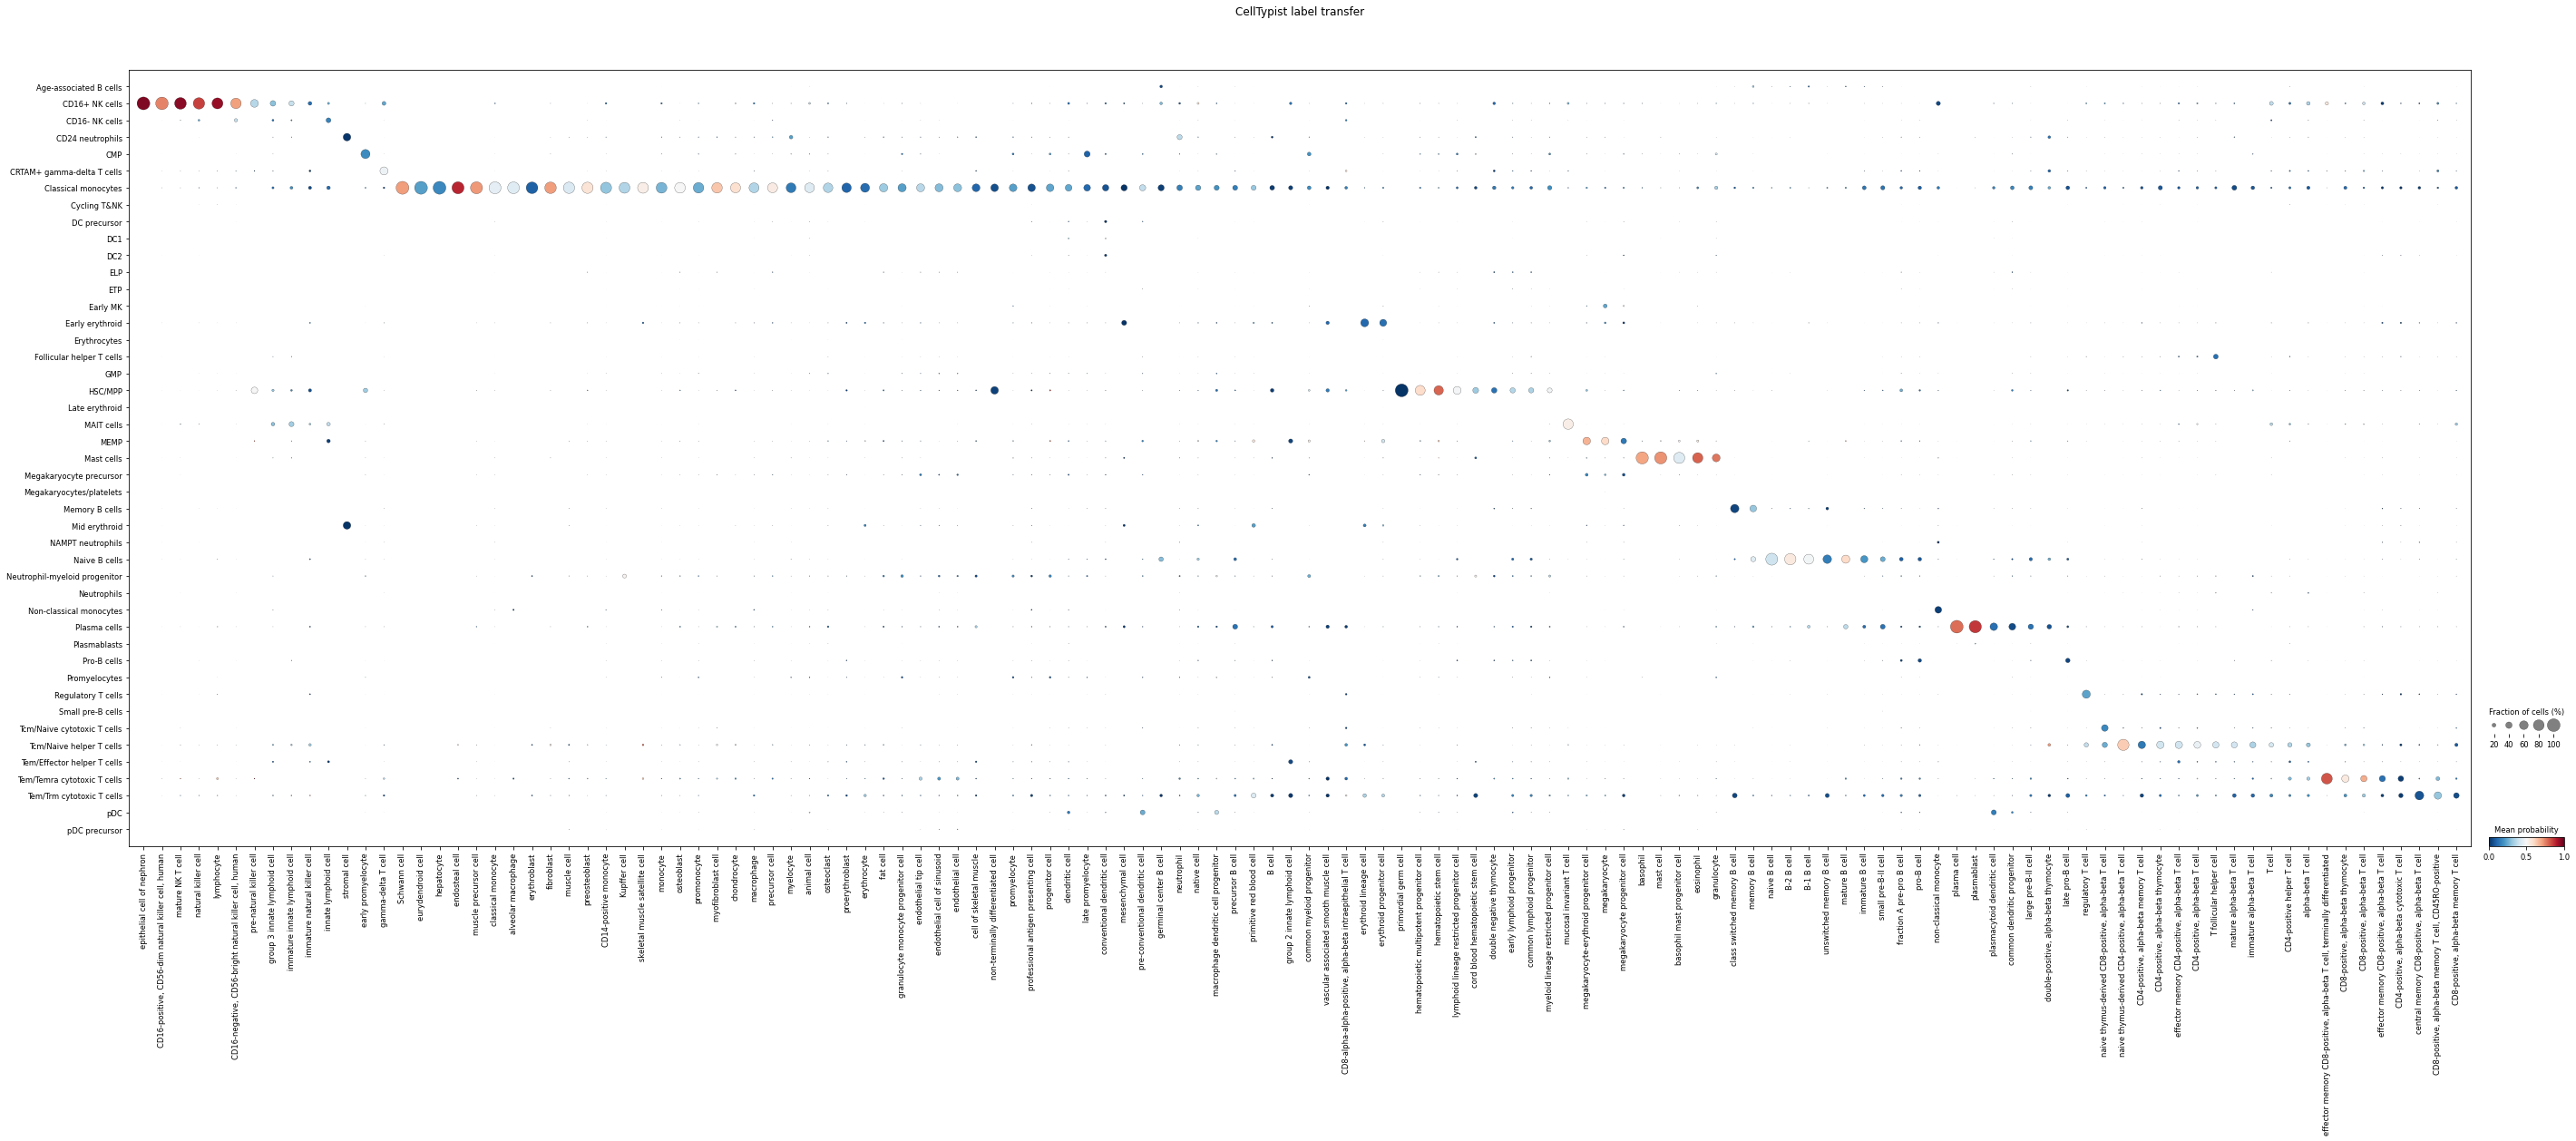

In [23]:
celltypist.dotplot(predictions, use_as_reference = 'cell_type', use_as_prediction = 'predicted_labels')